In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/PDFs")
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/DetResponse")
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/Utils")

from Detector import *
from Signal import *
from Plot_Histogram import *
import matplotlib.pyplot as plt
#Change the resolution of the plots
plt.rcParams['figure.dpi']= 200

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# <font color="darkmagenta"> PDFs computation functions </font>

In [14]:
# channel and mass
channel = "numunumu"
mass = 200
profile='NFW'
# Bin
Bin = Std_Binning(200, N_Etrue=300)
Reco = RecoRate(channel, 
            mass, 
            profile, 
            Bin,
            type="Resp",
            set='1122',
            spectra='PPPC4'
            )
        

In [15]:
Reco.hist['Spectra']=None
RecoHist = Reco.ComputeRecoRate()
# test = Reco.ComputeSpectra()

********************
Buiding final reco rate using Resp method
********************
Computing true rate with PPPC4 spectra
channel: numunumu || mass: 200 || profile: NFW || process: ann

********************
Computing Spectra
********************
Computing Jfactor with default option: precomputed Clumpy file
********************
Computing Response Matrix
********************
Accessing MC set 1122


In [14]:
np.min(RecoHist)

3018.76965900887

In [18]:
Reco_evtbyevt = RecoRate(channel, 
            mass, 
            profile, 
            Bin,
            type="evtbyevt",
            spectra='PPPC4',
            set='1122')

In [19]:
RecoHist_evtbyevt = Reco_evtbyevt.ComputeRecoRate()

********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 1122
Computing Jfactor with default option: precomputed Clumpy file
##Applying cut on weight##
Weight lim: 4247834044667460.5
##Applying cut on weight##
Weight lim: 1549880779292694.5
##Applying cut on weight##
Weight lim: 2447155233276363.0
##Applying cut on weight##
Weight lim: 1953302936853418.0
##Applying cut on weight##
Weight lim: 4081545145134153.5
##Applying cut on weight##
Weight lim: 2867201270036304.5
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 5070305)
Correct bias at boundary psi=0 using mirror data i.e reflection
bandwidth: 0.0104986206912076


In [20]:
np.sum(Reco.hist['RecoRate'])
np.sum(Reco.hist['RecoRate'])/np.sum(Reco_evtbyevt.hist['RecoRate'])


1.0415085649402265

In [21]:
ch_title = {"WW":r"$W^+ W^-$","bb":r"$b\bar{b}$","tautau":r"$\tau \bar{\tau}$", "mumu":r"$\mu^+\mu^-$","nuenue":r"$\nu_e \bar{\nu}_e$","numunumu":r'$\nu_\mu \bar{\nu}_\mu$',"nutaunutau":r"$\nu_\tau \bar{\nu}_\tau$"}


/tmp/ipykernel_16256/213932665.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(Reco.hist['TrueRate']['nu_tau']/np.sum(Reco.hist['TrueRate']['nu_tau']), np.array([Bin['true_psi_edges'], Bin['true_energy_edges']]), "Psi", "Energy", "Charon", zlogscale=True)


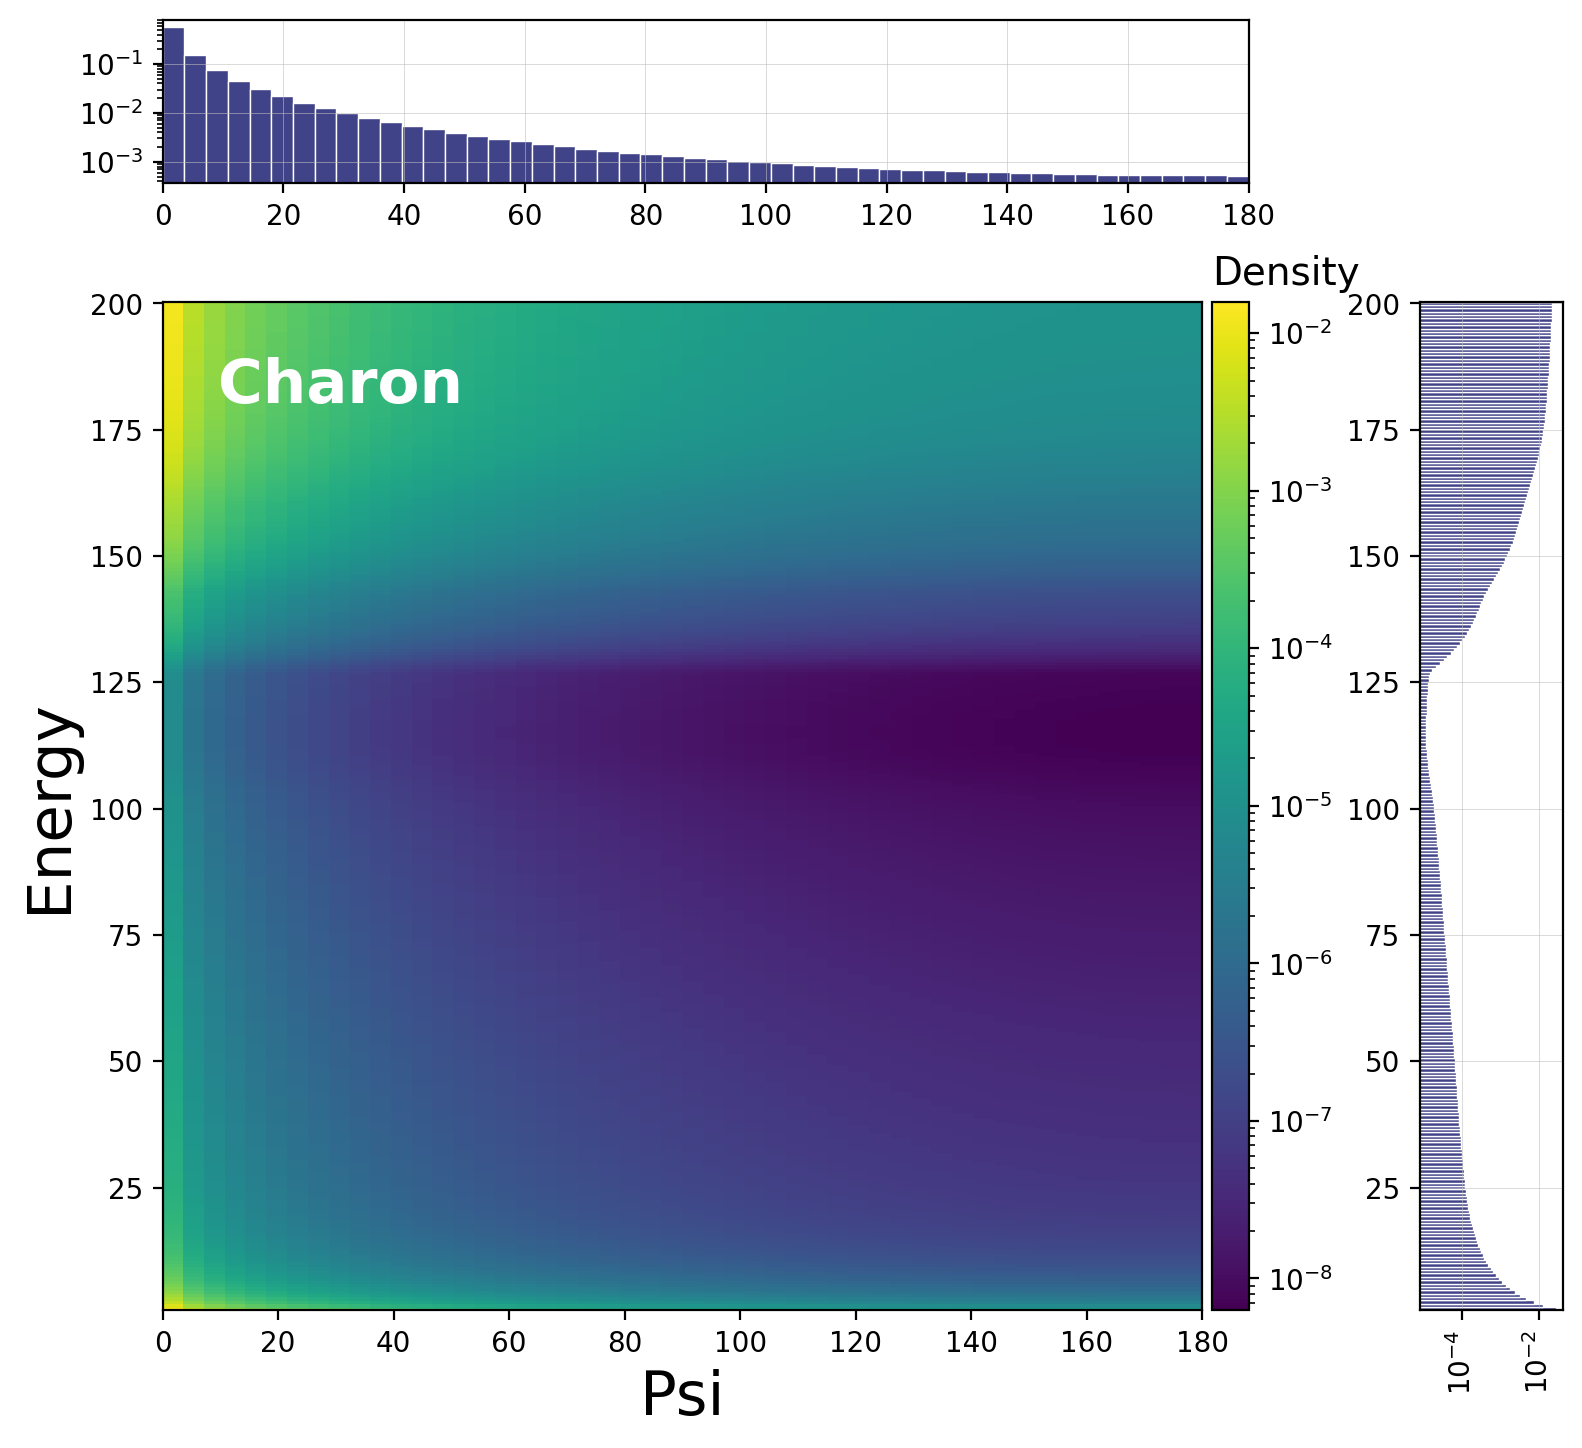

In [22]:
plot_projections(Reco.hist['TrueRate']['nu_tau']/np.sum(Reco.hist['TrueRate']['nu_tau']), np.array([Bin['true_psi_edges'], Bin['true_energy_edges']]), "Psi", "Energy", "Charon", zlogscale=True)


/tmp/ipykernel_16256/40259278.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(RecoHist_evtbyevt/np.sum(RecoHist_evtbyevt), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "Charon\n evtbyevt reweighted\n"+ ch_title[channel]+"- {} GeV".format(mass))


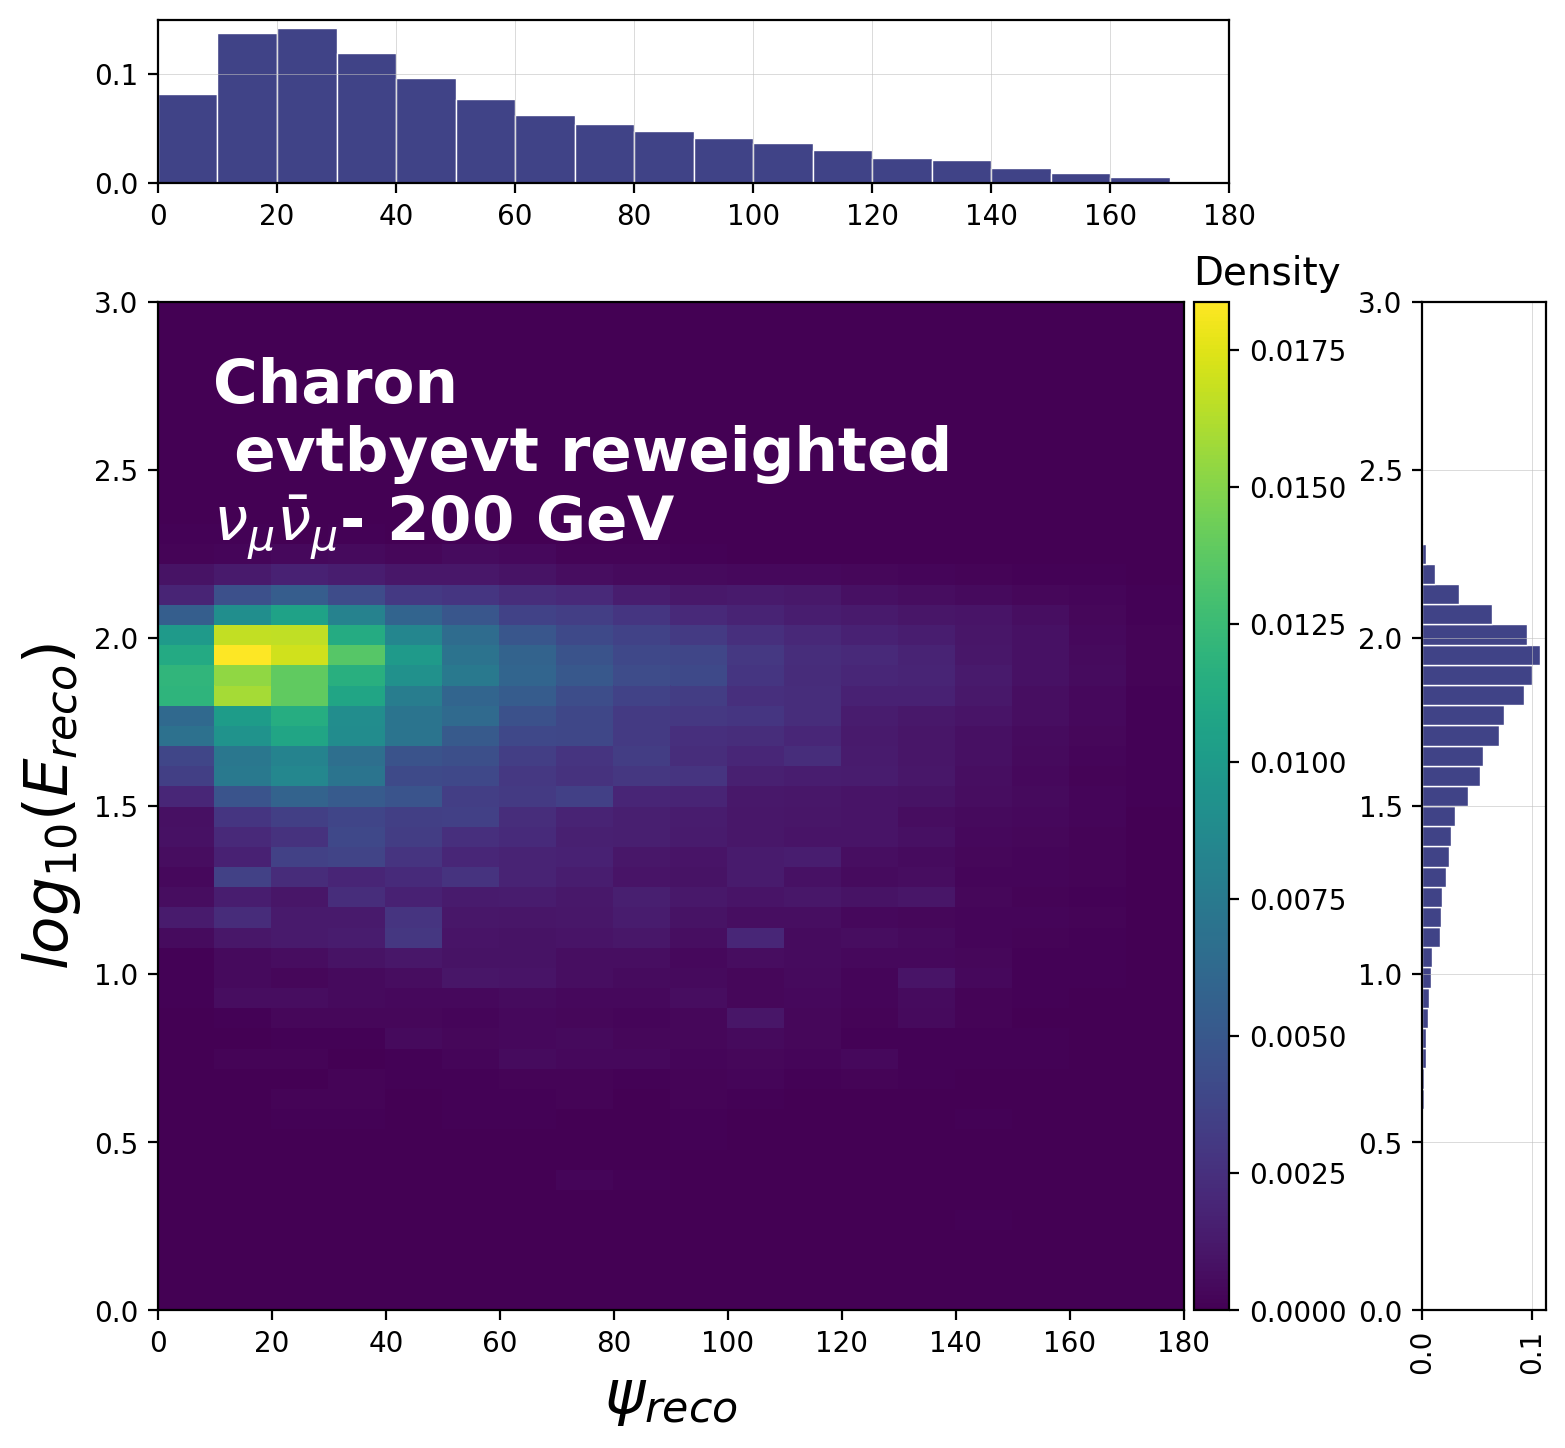

/tmp/ipykernel_16256/40259278.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(RecoHist/np.sum(RecoHist), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "Charon\n Flux x Resp\n"+ ch_title[channel] +"- {} GeV \n NFW".format(mass))


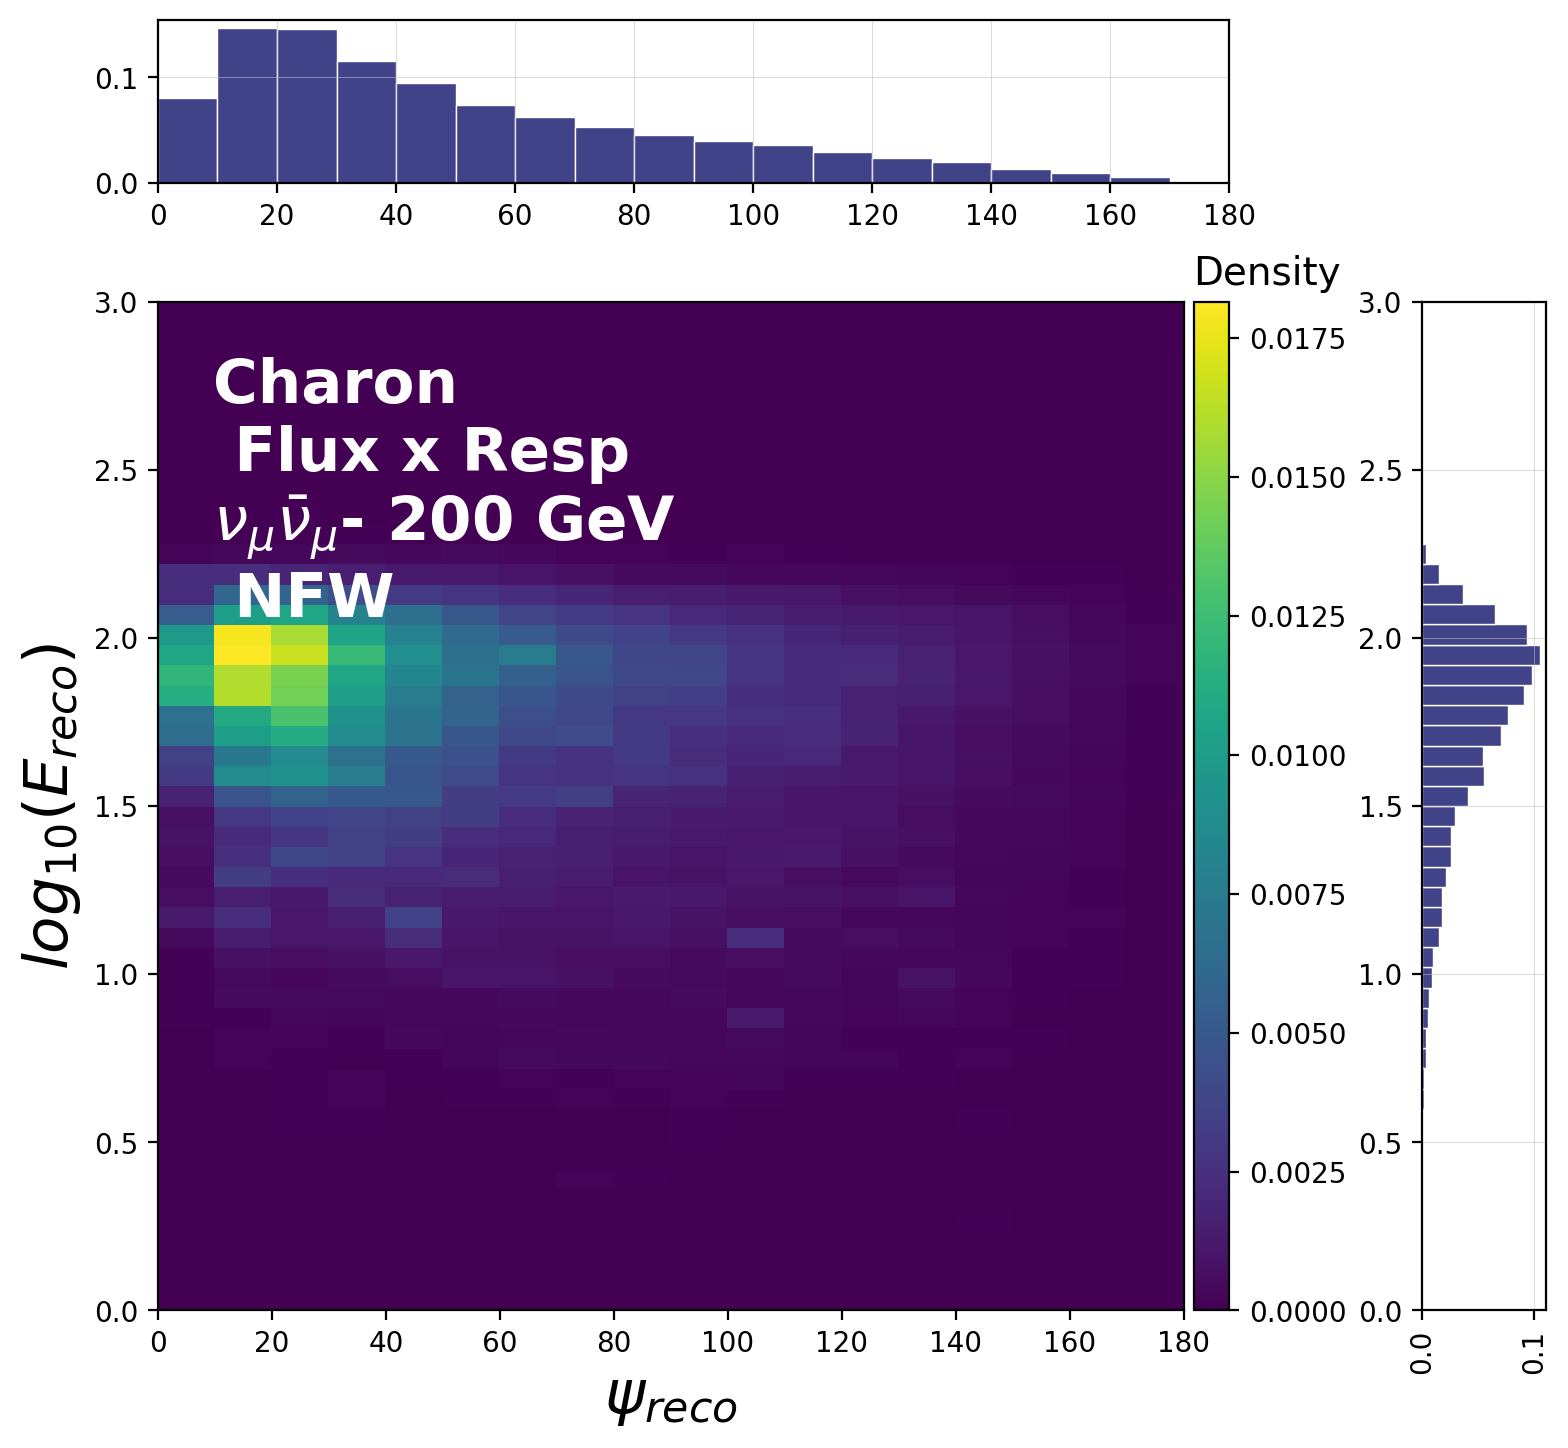

In [23]:
plot_projections(RecoHist_evtbyevt/np.sum(RecoHist_evtbyevt), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "Charon\n evtbyevt reweighted\n"+ ch_title[channel]+"- {} GeV".format(mass))
plot_projections(RecoHist/np.sum(RecoHist), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "Charon\n Flux x Resp\n"+ ch_title[channel] +"- {} GeV \n NFW".format(mass))


/tmp/ipykernel_10384/915275755.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(RecoHist/np.sum(RecoHist), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "NFW \n" + ch_title[channel] + " - {} GeV \n ".format(mass), savedir=saveloc)


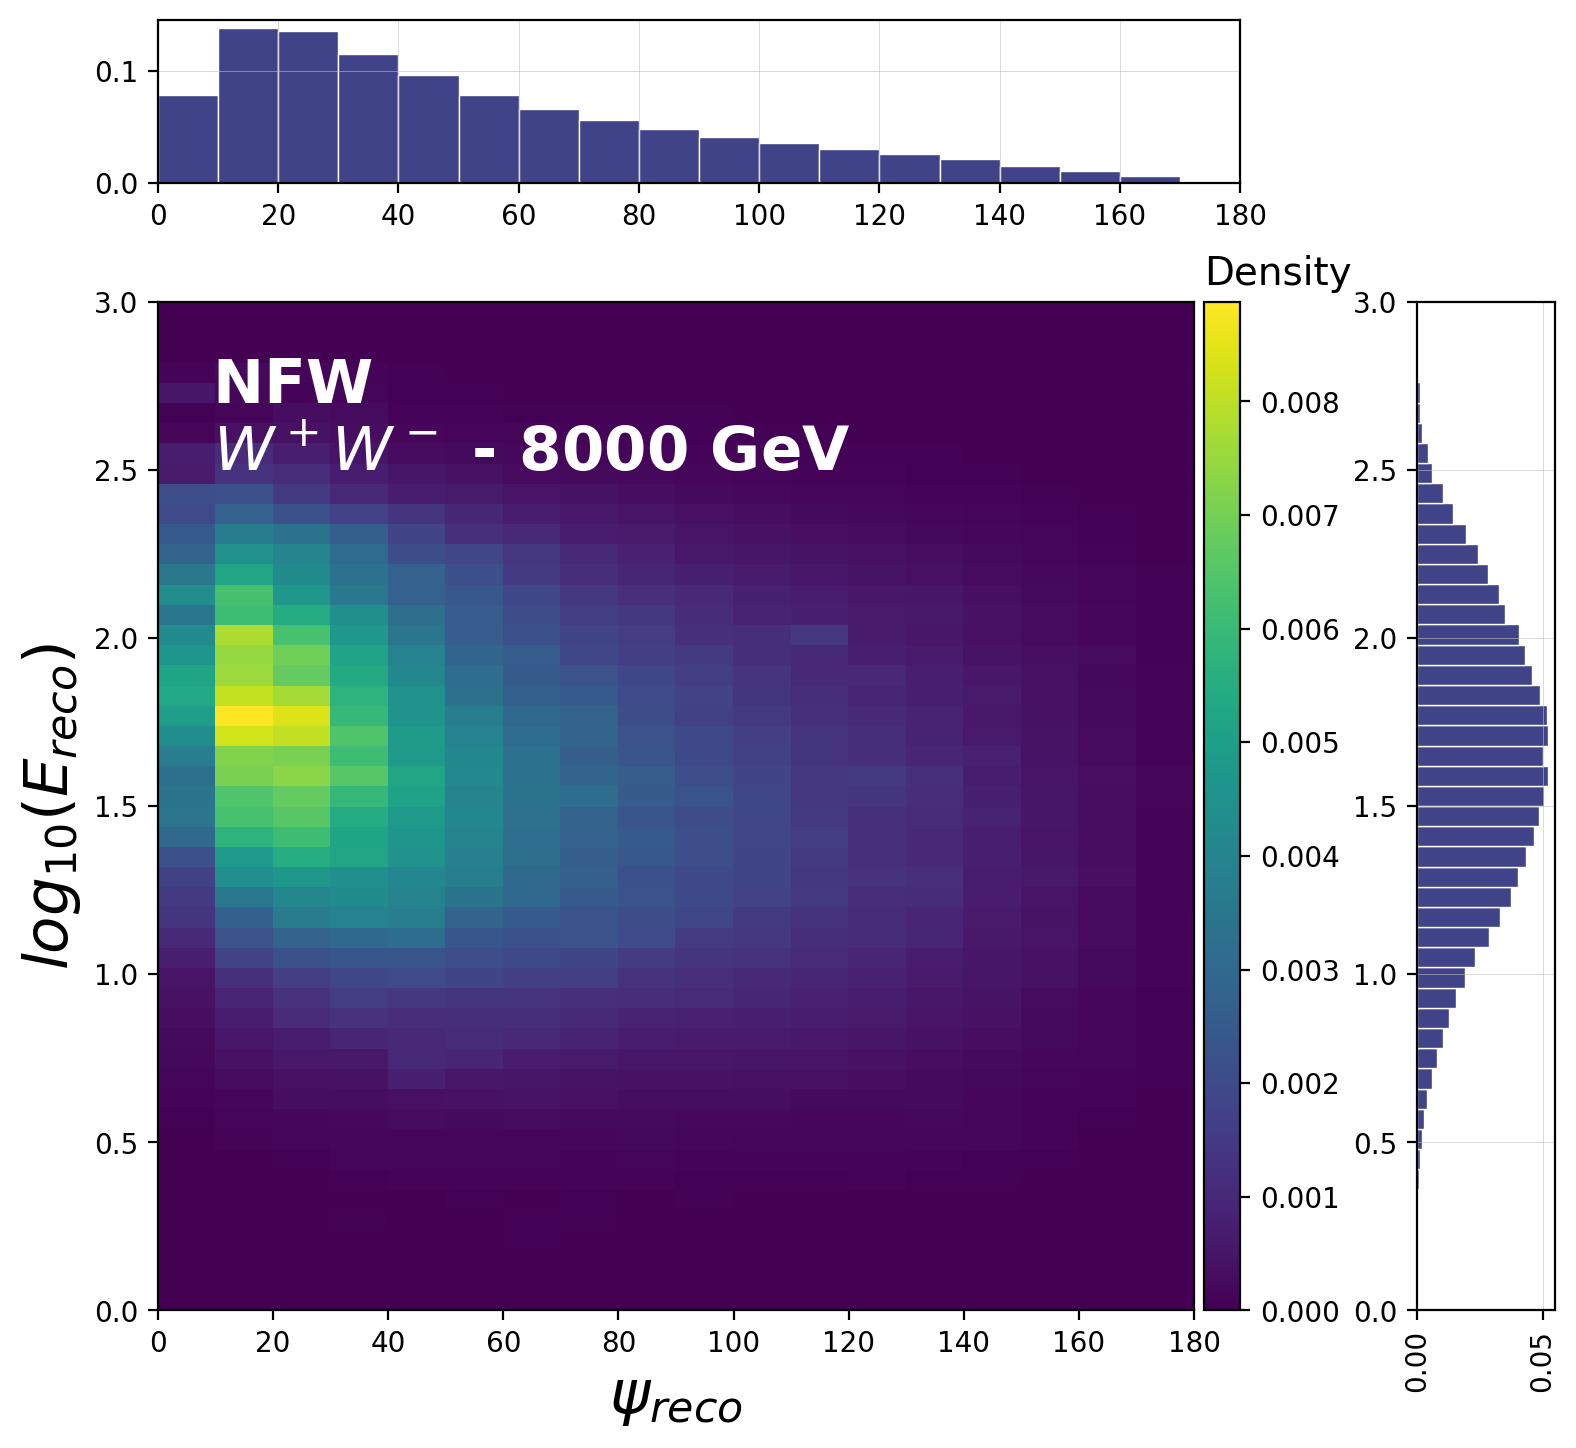

In [22]:
# Look good, let save it
saveloc='/data/user/tchau/Sandbox/GC_OscNext/PlotScripts/Plots/PDF_{}_{}_{}GeV.png'.format(profile, channel, mass)
plot_projections(RecoHist/np.sum(RecoHist), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "NFW \n" + ch_title[channel] + " - {} GeV \n ".format(mass), savedir=saveloc)


Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2012_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2013_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2014_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2015_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2016_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2017_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscN

/tmp/ipykernel_7222/261997094.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(Bkg_bwISJ/np.sum(Bkg_bwISJ), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "RA Scramble Bkg".format(mass))


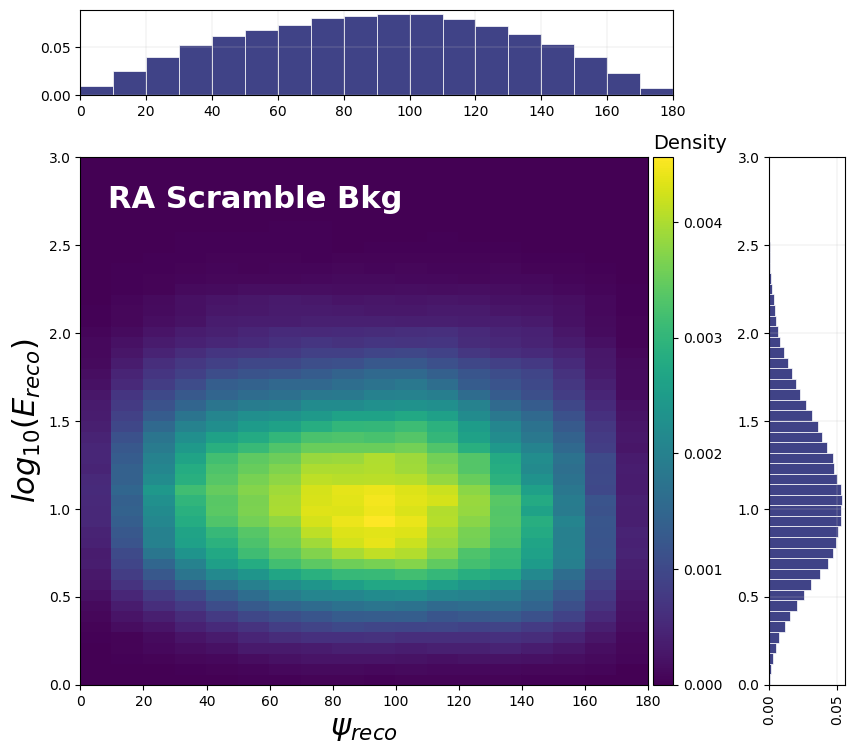

In [11]:
Bkg_bwISJ = ScrambleBkg(Bin, bw="ISJ", oversample=10)
plot_projections(Bkg_bwISJ/np.sum(Bkg_bwISJ), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "RA Scrambled Bkg".format(mass))


In [23]:
# channel and mass
channel = "WW"
mass = 8000
profile='NFW'
# Bin
Bin = Std_Binning(3000, N_Etrue=300)
Reco_Scr = RecoRate(channel, 
            mass, 
            profile, 
            Bin,
            type="Resp",
            Scramble=True)
Rate_Scr = Reco_Scr.ComputeRecoRate()

********************
Buiding final reco rate using Resp method
********************
Computing true rate with Charon spectra
channel: WW || mass: 8000 || profile: NFW || process: ann

********************
Computing Spectra
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
********************
Computing Jfactor with default option: precomputed Clumpy file
********************
Computing Response Matrix
********************
Accessing MC set 0000


/tmp/ipykernel_10384/2468401571.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(Rate_Scr/np.sum(Rate_Scr), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "Scrambled Signal  \n" +  ch_title[channel] +"- {} GeV".format(mass))


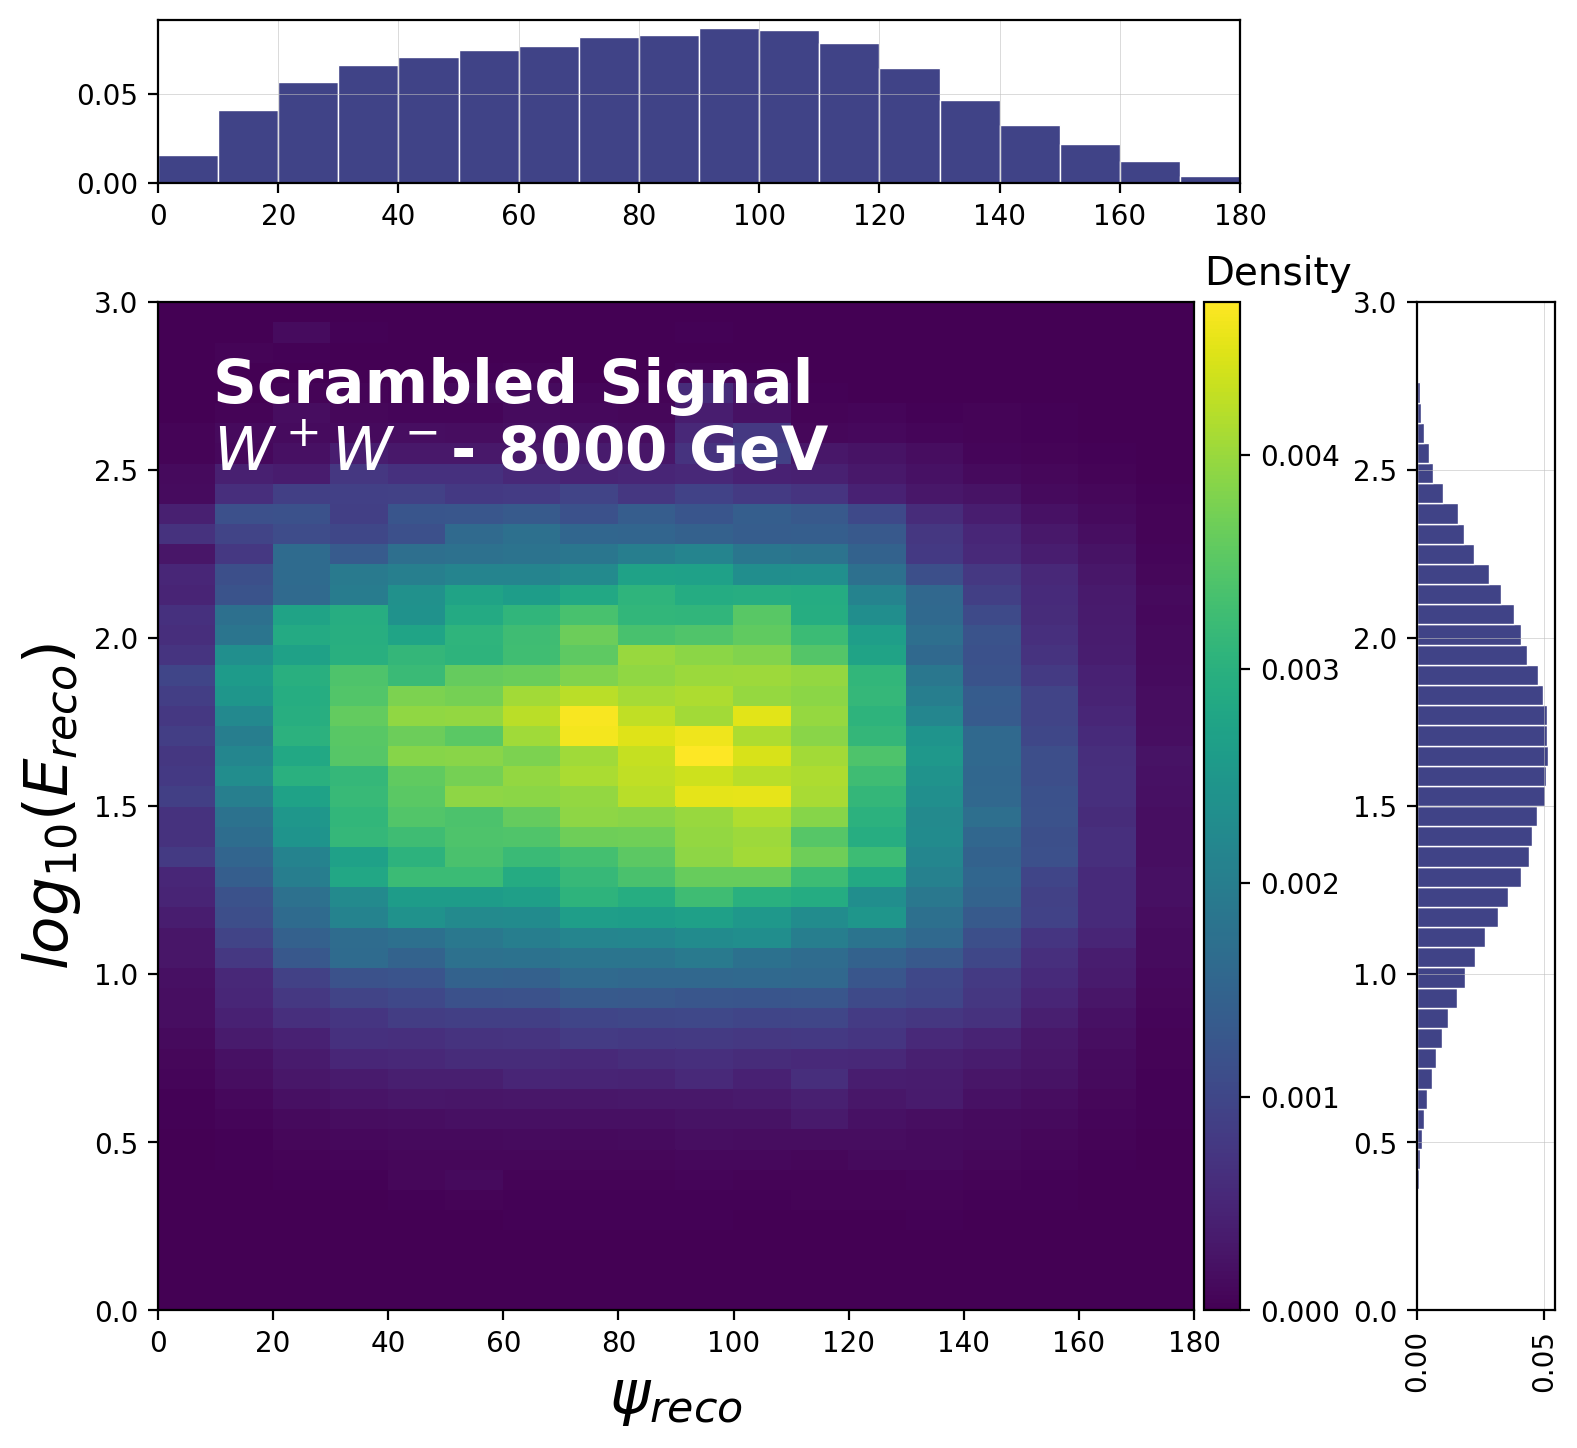

In [24]:
plot_projections(Rate_Scr/np.sum(Rate_Scr), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "Scrambled Signal  \n" +  ch_title[channel] +"- {} GeV".format(mass))


# <font color="darkmagenta"> Previous vertsion's results (Nadege) </font>

In [3]:
# Accessing Nadege's result:
file1 = "OscNext_L7_v02.00_1X0000_PDF_Signal_PID3_psi18_E50_sklearnKDEappliedfromReco_0.03Bandwidth_RemovedHighWeightEventTrue_PostCutFinalL7_PPPC4Spectra_PredefinedBinning_UncertaintyIncluded_newCuts.pkl"
file2 = "OscNext_L7_v02.00_1X0000_PDF_Signal_PID3_psi18_E50_sklearnKDEappliedfromReco_0.03Bandwidth_RemovedHighWeightEventTrue_PostCutFinalL7_PPPC4Spectra_PredefinedBinning_UncertaintyIncluded.pkl"

nadege1 = pkl.load(open("/data/user/niovine/projects/DarkMatter_OscNext/Histograms/Signal/PPPC4/{}".format(file1), "rb"))
nadege2 = pkl.load(open("/data/user/niovine/projects/DarkMatter_OscNext/Histograms/Signal/PPPC4/{}".format(file2), "rb"))

In [4]:
Nad = nadege2['NFW_WW_90']['PDF']
pdf_nadege = Nad[0] +  Nad[1] +  Nad[2]

/tmp/ipykernel_17104/754138617.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(pdf_nadege/np.sum(pdf_nadege), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"log$_{10}(E_{reco})$", r"PPPC4"+"\n"+"evt-by-evt reweighted" "\n" r"$\nu_\mu \bar{\nu}_\mu$, 50 GeV" "\n" "NFW")


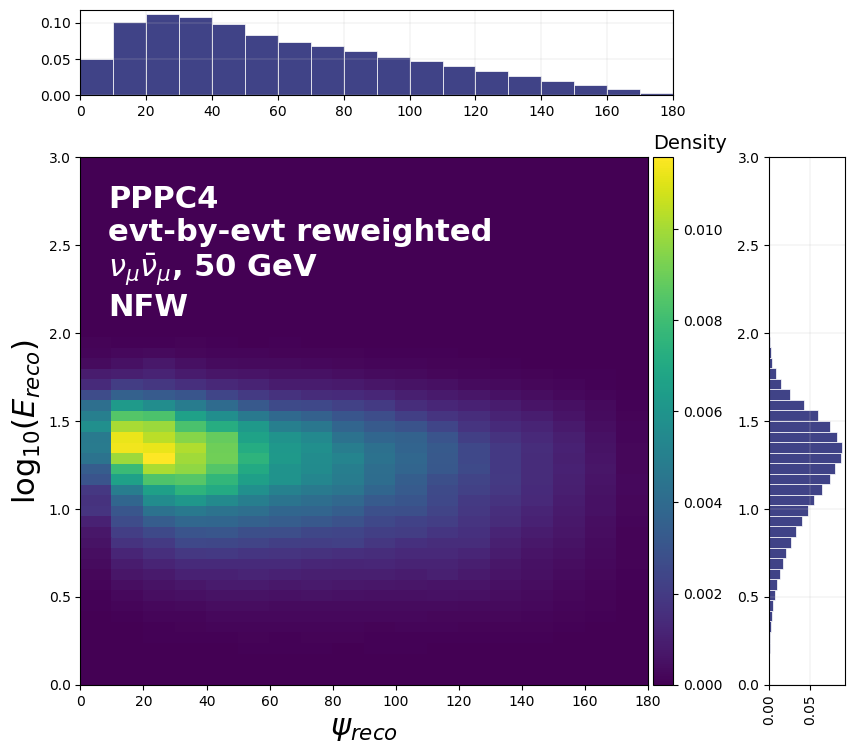

In [28]:
plot_projections(pdf_nadege/np.sum(pdf_nadege), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"log$_{10}(E_{reco})$", r"PPPC4"+"\n"+"evt-by-evt reweighted" "\n" r"$\nu_\mu \bar{\nu}_\mu$, 50 GeV" "\n" "NFW")